### Imports

In [77]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import zipfile
import pandas as pd
from tensorflow.keras.models import Model
from datetime import date

In [ ]:
!wget --no-check-certificate  "https://docs.google.com/uc?export=download&id=1Z6prOKKx_n6vi5B-9ROi4Kml629YW82U" -O csse_covid_19_daily_reports_us.csv
df = pd.read_csv("csse_covid_19_daily_reports_us.csv")


--2022-12-12 18:53:56--  https://docs.google.com/uc?export=download&id=1Z6prOKKx_n6vi5B-9ROi4Kml629YW82U
Resolving docs.google.com (docs.google.com)... 142.251.10.101, 142.251.10.139, 142.251.10.100, ...
Connecting to docs.google.com (docs.google.com)|142.251.10.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-3g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6tu70f0b6fceheqk6pemvv54ksuebqvm/1670871225000/11775004971777612615/*/1Z6prOKKx_n6vi5B-9ROi4Kml629YW82U?e=download&uuid=72a7d205-8f7c-4dee-9c53-744684c2e1d8 [following]
--2022-12-12 18:53:58--  https://doc-0k-3g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6tu70f0b6fceheqk6pemvv54ksuebqvm/1670871225000/11775004971777612615/*/1Z6prOKKx_n6vi5B-9ROi4Kml629YW82U?e=download&uuid=72a7d205-8f7c-4dee-9c53-744684c2e1d8
Resolving doc-0k-3g-docs.googleusercontent.com (doc-0k-3g-docs.googleusercontent.com)... 142.251.10.132, 2404:6800:

### Inspecting and Cleaning Data

In [ ]:
df.describe(include="all")

,Unnamed: 0,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,...,Incident_Rate,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,People_Tested,Mortality_Rate
count,41372.000000,41372,41372,41353,39928.000000,39928.000000,4.137200e+04,41372.000000,1.512200e+04,1.512200e+04,...,39928.000000,2.796600e+04,5129.000000,28785.000000,4.137200e+04,41372,39782.000000,5129.000000,1.181600e+04,12027.000000
unique,NaN,59,1,923,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,NaN,Alabama,US,2020-04-22 23:40:26,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,USA,NaN,NaN,NaN,NaN
freq,NaN,713,41372,59,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,37807,NaN,NaN,NaN,NaN
mean,20685.500000,NaN,NaN,NaN,36.840089,-85.206614,5.122606e+05,8400.130765,8.578908e+04,5.936916e+04,...,8512.880588,9.479087e+06,6151.226555,1.523775,7.676512e+07,NaN,114261.974779,12.143891,1.111017e+06,3.322792
std,11943.212005,NaN,NaN,NaN,10.789527,49.308829,8.858438e+05,13216.530073,1.933303e+05,1.190129e+05,...,7292.867748,1.560543e+07,13791.089316,0.626974,2.357275e+07,NaN,107913.458652,5.245396,2.059628e+06,2.487746
min,0.000000,NaN,NaN,NaN,-14.271000,-170.132200,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,...,0.000000,1.768000e+03,2.000000,0.000000,1.600000e+01,NaN,5.391708,1.418440,3.000000e+00,0.000000
25%,10342.750000,NaN,NaN,NaN,34.594600,-101.165775,3.324825e+04,618.000000,3.872000e+03,3.166000e+03,...,1767.557282,1.815820e+06,558.000000,1.183432,8.400001e+07,NaN,27433.918573,8.359942,1.132178e+05,1.667964
50%,20685.500000,NaN,NaN,NaN,39.061850,-87.944200,1.828565e+05,2981.500000,1.754850e+04,1.475250e+04,...,8019.941656,4.494740e+06,2014.000000,1.472254,8.400003e+07,NaN,92559.255452,11.282093,4.153255e+05,2.850501
75%,31028.250000,NaN,NaN,NaN,42.361650,-76.970625,6.247955e+05,10216.250000,8.425575e+04,6.111500e+04,...,12581.145790,1.053448e+07,6001.000000,1.802741,8.400004e+07,NaN,165314.581233,15.268243,1.152972e+06,4.473480


In [ ]:
df=df.reset_index()

Convert last_update to datetime

In [ ]:
from datetime import datetime
df["Date"]=pd.to_datetime(df["Last_Update"]).dt.date
df.drop(columns=["Last_Update"], inplace=True)

Remove observations "Recovered", "American Samo", "Diamond Princess" and "Grand Princes", "virgin islands" and "Northern Mariana Islands". Now all states have 713 observations

In [ ]:
df=df[(df["Province_State"]!="Recovered") & (df["Province_State"]!="American Samoa") & (df["Province_State"]!="Diamond Princess") & (df["Province_State"]!="Grand Princess")& 
            (df["Province_State"]!="Virgin Islands")& (df["Province_State"]!="Northern Mariana Islands")]
df.groupby(["Province_State"]).count()["Date"]

Province_State
Alabama                 713
Alaska                  713
Arizona                 713
Arkansas                713
California              713
Colorado                713
Connecticut             713
Delaware                713
District of Columbia    713
Florida                 713
Georgia                 713
Guam                    713
Hawaii                  713
Idaho                   713
Illinois                713
Indiana                 713
Iowa                    713
Kansas                  713
Kentucky                713
Louisiana               713
Maine                   713
Maryland                713
Massachusetts           713
Michigan                713
Minnesota               713
Mississippi             713
Missouri                713
Montana                 713
Nebraska                713
Nevada                  713
New Hampshire           713
New Jersey              713
New Mexico              713
New York                713
North Carolina          713
North

Sort the data for each state by the last_update

In [ ]:
df=df.sort_values(by=["Province_State","Date"])

get "day of week", "day", and "month" variables from last_update

In [ ]:
df["day_of_week"]=pd.to_datetime(df["Date"]).dt.dayofweek
df["day"]=pd.to_datetime(df["Date"]).dt.day
month=pd.to_datetime(df["Date"]).dt.month
df["year"]= pd.to_datetime(df["Date"]).dt.year
df["month"]=month
df=df.drop("Date", axis=1)

Only select the variables we want to use in the model

In [ ]:
df= df[["Province_State", "Incident_Rate", "Confirmed", "Deaths","day_of_week","day", "month", "year"]]
df.head(14)

,Province_State,Incident_Rate,Confirmed,Deaths,day_of_week,day,month,year
18913,Alabama,74.788122,3667,93,6,12,4,2020
23035,Alabama,78.928288,3870,99,0,13,4,2020
19901,Alabama,82.415817,4041,114,1,14,4,2020
36904,Alabama,87.840863,4307,118,2,15,4,2020
27038,Alabama,91.063258,4465,133,3,16,4,2020
19494,Alabama,92.939589,4557,148,4,17,4,2020
22338,Alabama,97.650813,4788,153,5,18,4,2020
33710,Alabama,101.525845,4978,157,6,19,4,2020
34117,Alabama,105.298903,5163,163,0,20,4,2020
2436,Alabama,110.214075,5404,183,1,21,4,2020


Check for missing values

In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

Province_State    0.0
Incident_Rate     0.0
Confirmed         0.0
Deaths            0.0
day_of_week       0.0
day               0.0
month             0.0
year              0.0
dtype: float64

In [50]:
def split(df, p_train, p_val):
  #get the number of samples
  n = len(df)
  num_train_samples = int(n*p_train)
  num_val_samples=int(n*p_val)
  num_test_samples = int(n*(1-p_train-p_val))
  return (num_train_samples, num_val_samples, num_test_samples)

def normalize(df,num_train_samples, target_index):
   train_mean = df[:num_train_samples].mean(axis=0)
   train_std = df[:num_train_samples].std(axis=0)
   df = (df - train_mean) / train_std
   return df

#takes a variable, ds, containing aggregated counts and converts it to 7 day moving average of daily counts
def convert_aggregated_to_MA(ds,window=7):
  # take the difference between consecutive samples in ds to get the daily counts
  ds= ds.diff()
  
  #replace a negataive daily count with its previous count if the previous count is positive; otherwise replace it with zero
  for i in range(0, len(ds)):
    if((ds.iloc[i]<0)):
      if (ds.iloc[i-1]>0):
        ds.iloc[i]=ds.iloc[i-1]
      else:
        ds.iloc[i]=0
 
 # take the moving average. The window is the size of the window for the moving average deafulted to 7 days.
  return ds.rolling(window).mean()


def create_time_series(df, seq_len, offset, num_train_samples, num_val_samples, target):
  #sequence_length is the number of past observations you want to use for prediction.


  # delay is the forecasting interval, that is, how many time steps into the future you want to predict.
  # we want to forecast the temprature 24 hours into the future
  delay=seq_len+offset-1

  train_dataset = keras.preprocessing.timeseries_dataset_from_array(
  data=df[:-delay],
  targets=df[target][delay:],
  sequence_length=seq_len,
  start_index=0,
  end_index=num_train_samples)


  val_dataset = keras.preprocessing.timeseries_dataset_from_array(
  data=df[:-delay],
  targets=df[target][delay:],
  sequence_length=seq_len,
  start_index=num_train_samples,
  end_index=num_train_samples + num_val_samples)


  test_dataset = keras.preprocessing.timeseries_dataset_from_array(
  data=df[:-delay],
  targets=df[target][delay:],
  sequence_length=seq_len,
  batch_size=30,
  start_index=num_train_samples + num_val_samples)

  return (train_dataset, val_dataset, test_dataset)

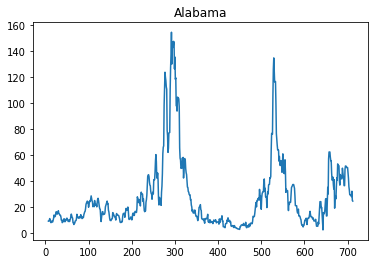

423
105


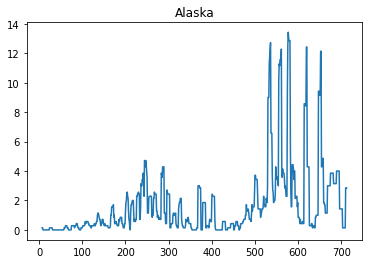

423
105


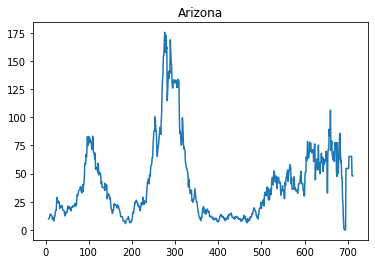

423
105


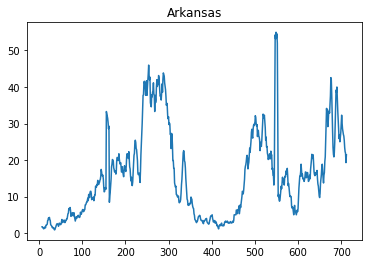

423
105


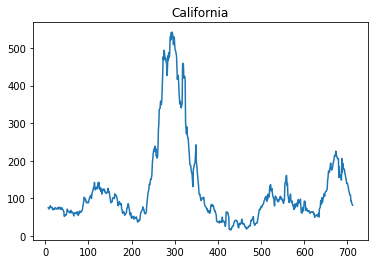

423
105


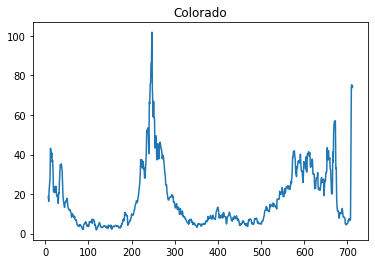

423
105


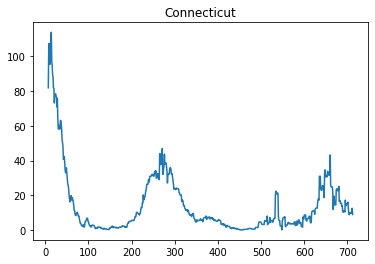

423
105


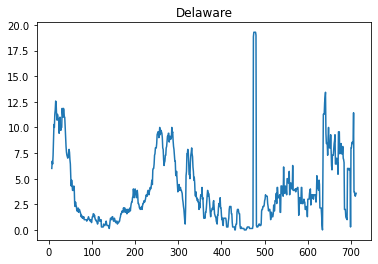

423
105


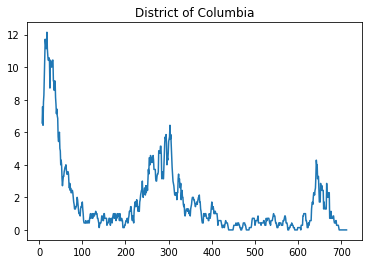

423
105


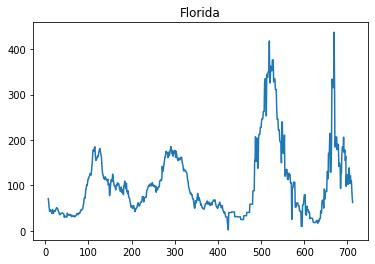

423
105


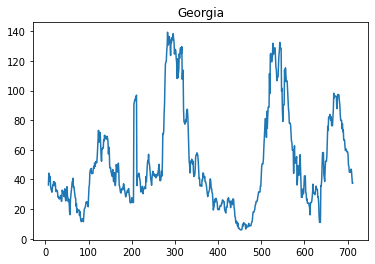

423
105


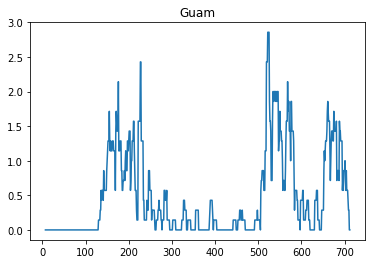

423
105


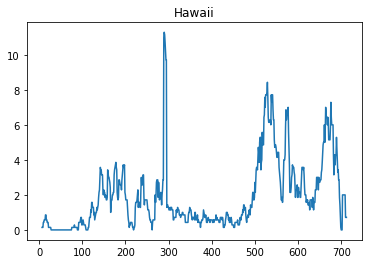

423
105


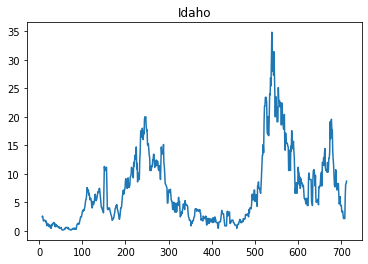

423
105


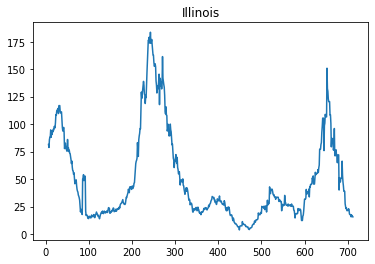

423
105


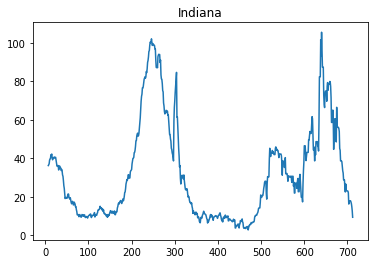

423
105


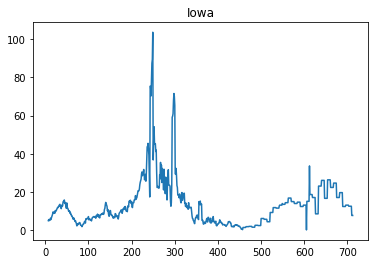

423
105


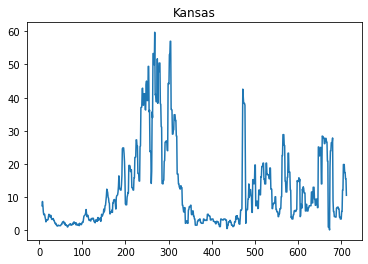

423
105


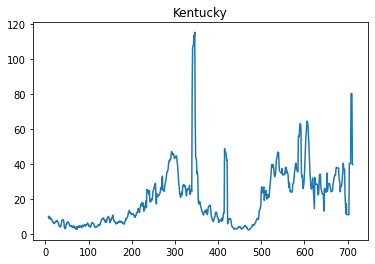

423
105


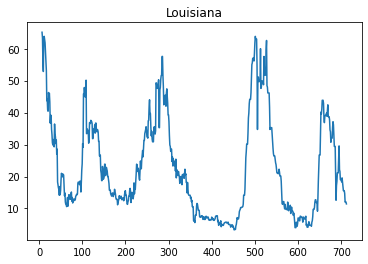

423
105


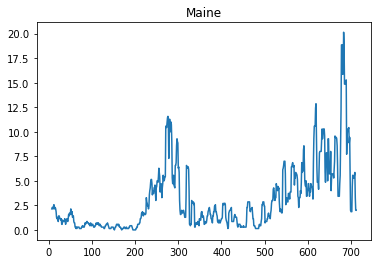

423
105


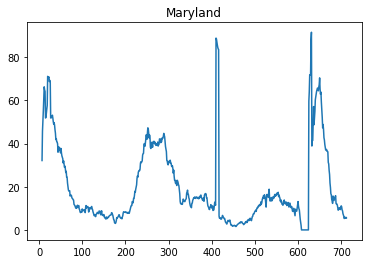

423
105


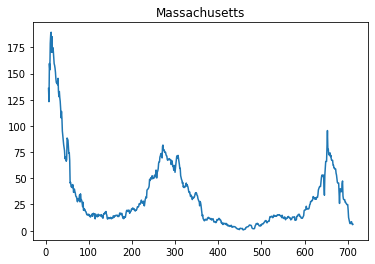

423
105


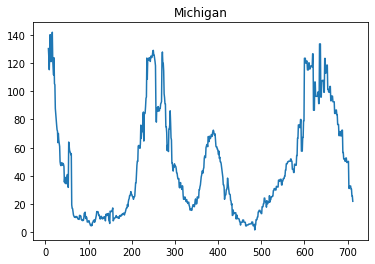

423
105


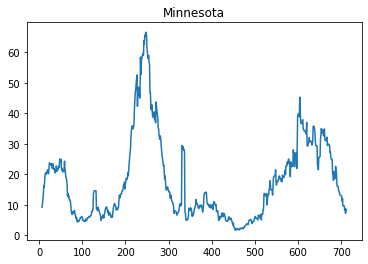

423
105


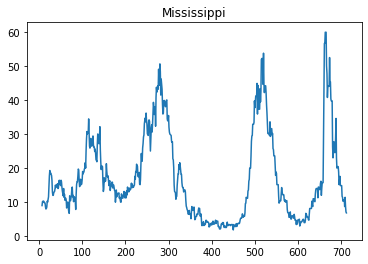

423
105


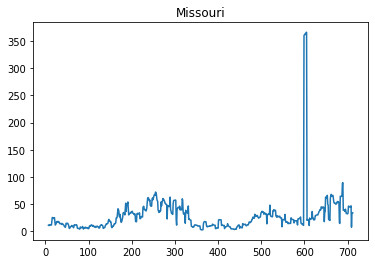

423
105


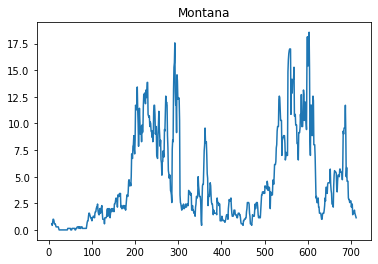

423
105


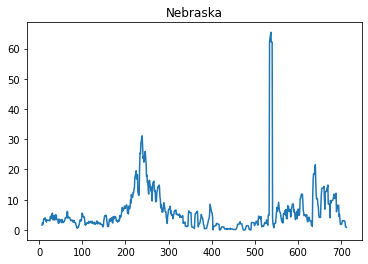

423
105


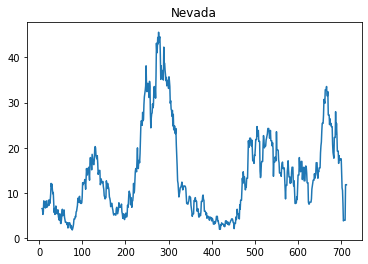

423
105


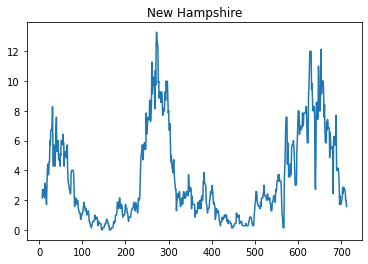

423
105


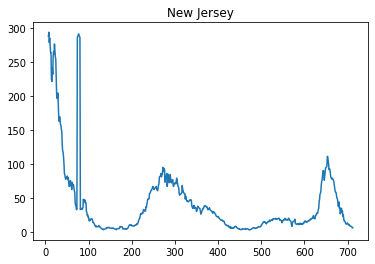

423
105


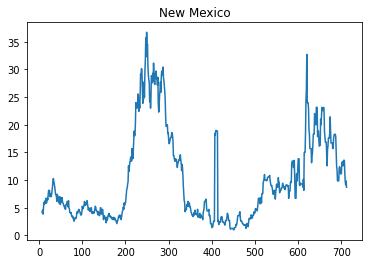

423
105


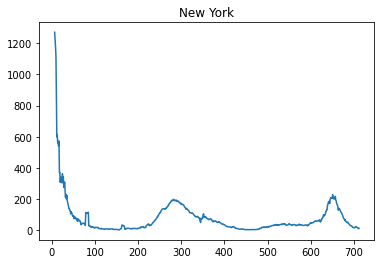

423
105


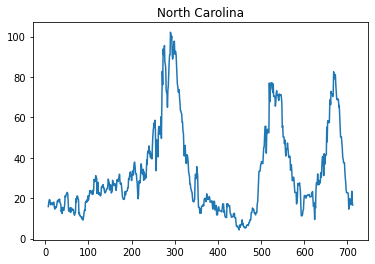

423
105


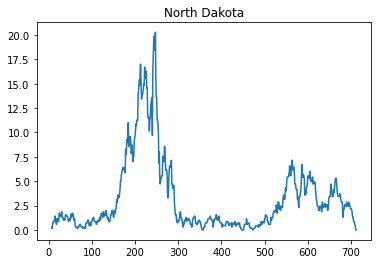

423
105


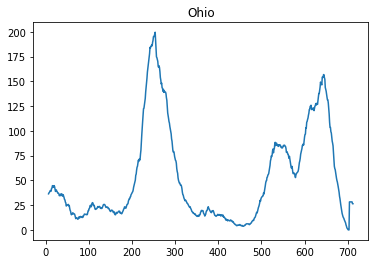

423
105


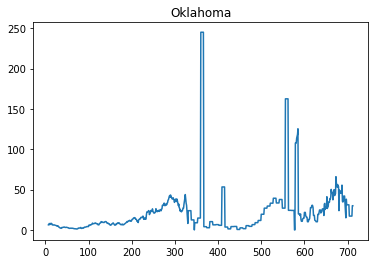

423
105


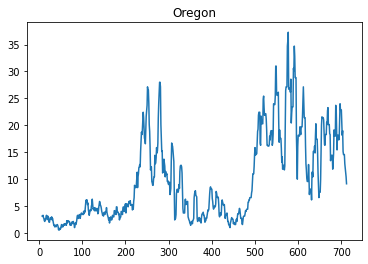

423
105


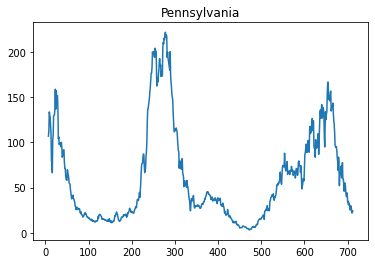

423
105


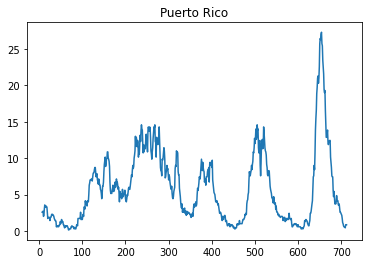

423
105


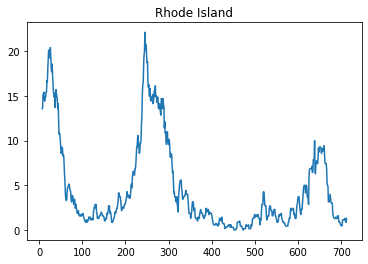

423
105


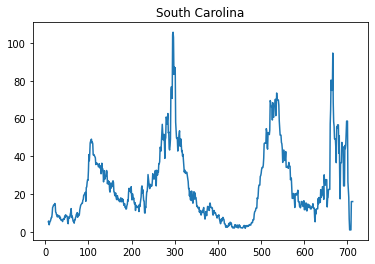

423
105


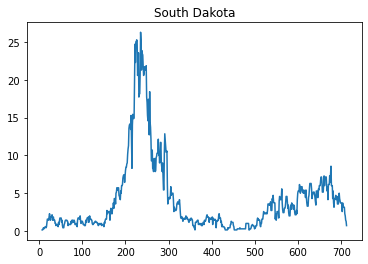

423
105


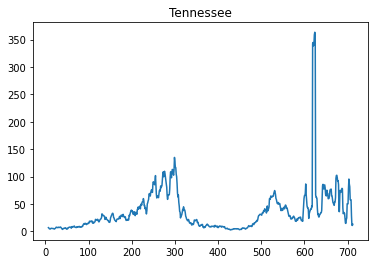

423
105


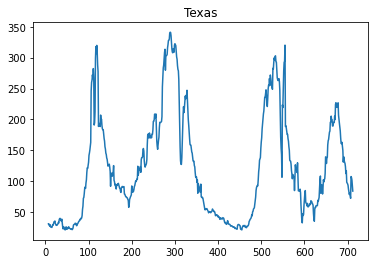

423
105


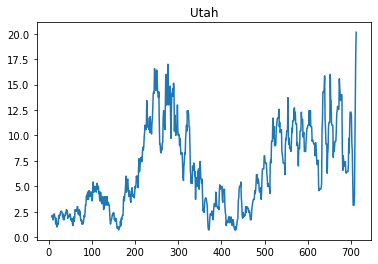

423
105


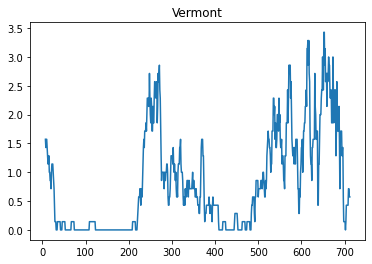

423
105


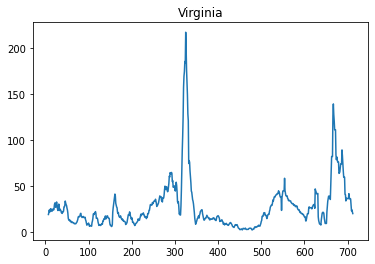

423
105


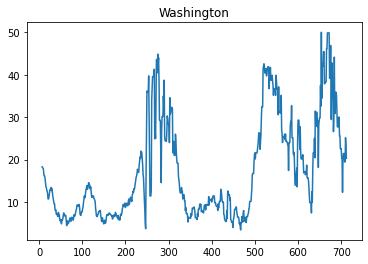

423
105


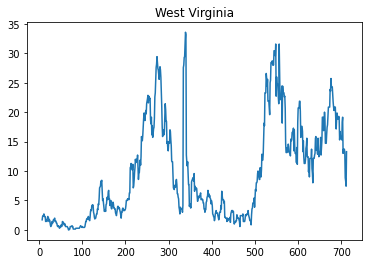

423
105


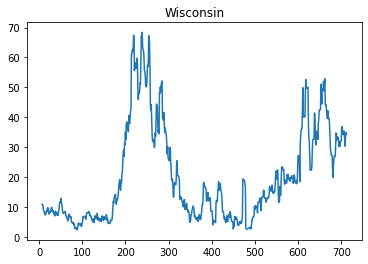

423
105


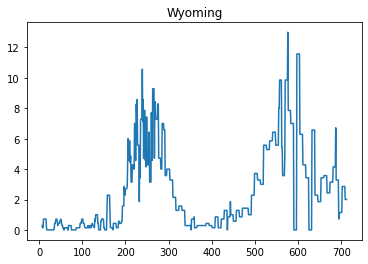

423
105


In [54]:
import tensorflow_datasets as tfds
deaths= df['Deaths']
confirmed= df["Confirmed"]
states= df['Province_State'].unique()
train_sequences, val_sequences, test_sequences=[],[],[]
train_labels,val_labels,test_labels=[],[],[]
train_means,train_stds=[],[]
#global train_ds
#global test_ds
#global val_ds

for i,state in enumerate(states):
   
  state_df= df.loc[df["Province_State"]==state].copy()
 
  #prepare deaths and confirmed variables
  state_df.Deaths= convert_aggregated_to_MA(state_df["Deaths"], window=7)
  state_df.Confirmed= convert_aggregated_to_MA(state_df["Confirmed"], window=7)
  plt.plot(range(len(state_df.Deaths)), state_df.Deaths)
  plt.title(state)
  plt.show()
  #print(state_df.head(10))
  #break
  state_df= state_df.dropna()


  state_df=state_df.drop("Province_State", axis=1)

 
  #split 
  (train_num,val_num,test_num)=split(state_df,p_train=0.6,p_val=0.15)
  print(train_num)
  print(val_num)

  #normalize
  state_df= normalize(state_df,train_num,2)
  

  #Get timeseries datasets
  (train_ds_state, val_ds_state, test_ds_state)= create_time_series(state_df, seq_len=60, offset=30, num_train_samples=train_num, num_val_samples=val_num, target="Deaths")
 
  if (i==0):
    train_ds = train_ds_state
    val_ds = val_ds_state
    test_ds = test_ds_state
  else:
    train_ds = train_ds.concatenate(train_ds_state)
    val_ds = val_ds.concatenate(val_ds_state)
    test_ds = test_ds.concatenate(test_ds_state)

total number of samples in train_ds, test_ds, and val_ds.

In [55]:
print(len(list(train_ds.unbatch())))
print(len(list(val_ds.unbatch())))
print(len(list(test_ds.unbatch())))

19292
2438
1590


### Commonsense Baseline Model

In [56]:
def evaluate_model(dataset, model=None):
  total_abs_err = 0.
  num_sequences = 0
  # the index of the Deaths variable in the data.
  deaths_index = 2
  for samples, targets in dataset:
    
    #if model is None, use commonsense baseline, that is predict the target to be its last measurement in the input sequence
    if model==None:    
      #for each sequence in the batch predict the target to be samples[:, -1, deaths_index] which is is the last Deaths measurement in the input sequence
      #index -1 in samples[:, -1, temp_index] means the last time step in the sequence 
      preds = samples[:, -1, deaths_index] 

    #if model is not None, get its predictions
    else:
      preds = model.predict(samples, verbose=0).flatten()

    #preds, targets=unnormalize(preds, targets, train_mean[temp_index], train_std[temp_index])

    # add the absolute difference between the predictions and targets to total_abs_err
    total_abs_err += np.sum(np.abs(preds - targets))
    
    # add the number of sequences in this batch to num_sequences
    num_sequences += samples.shape[0]

  #get the average absolute error
  return total_abs_err / num_sequences
print(f"Validation MAE Baseline: {evaluate_model(val_ds):.2f}")  

Validation MAE Baseline: 0.96


### MLP model with dropout and weight decay

In [112]:
seq_len=60
#every sample in train/validation/test is a 2d tensor of shape (sequence_length, num_features)
num_features= 7
inputs = keras.Input(shape=(seq_len, 7))
x = layers.Flatten()(inputs)
x = layers.Dense(64, activation="relu", kernel_regularizer='l1_l2')(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1)(x)
fully_connected_model = keras.Model(inputs, outputs)

fully_connected_model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])


# check point the best model
checkpoint= keras.callbacks.ModelCheckpoint("temp_fully_connected.keras",save_best_only=True)

#stop trianing if validation loss does not imrove for 5 consecutive epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, min_delta=1e-3, restore_best_weights=True)


history = fully_connected_model.fit(train_ds,
epochs=50,
validation_data=val_ds,
callbacks=[checkpoint, early_stopping])

Epoch 1/50
159/159 [==============================] - 8s 50ms/step - loss: 12.7513 - mae: 0.8158 - val_loss: 9.4224 - val_mae: 0.9647
Epoch 2/50
159/159 [==============================] - 6s 36ms/step - loss: 5.4833 - mae: 0.5521 - val_loss: 4.5942 - val_mae: 0.8483
Epoch 3/50
159/159 [==============================] - 6s 39ms/step - loss: 2.2589 - mae: 0.5030 - val_loss: 2.6743 - val_mae: 0.7779
Epoch 4/50
159/159 [==============================] - 5s 30ms/step - loss: 1.0960 - mae: 0.4940 - val_loss: 2.1847 - val_mae: 0.7696
Epoch 5/50
159/159 [==============================] - 6s 36ms/step - loss: 0.8519 - mae: 0.4998 - val_loss: 2.1042 - val_mae: 0.7714
Epoch 6/50
159/159 [==============================] - 6s 37ms/step - loss: 0.7902 - mae: 0.4920 - val_loss: 2.0892 - val_mae: 0.7809
Epoch 7/50
159/159 [==============================] - 5s 30ms/step - loss: 0.7716 - mae: 0.4847 - val_loss: 2.0246 - val_mae: 0.7926
Epoch 8/50
159/159 [==============================] - 5s 33ms/step -

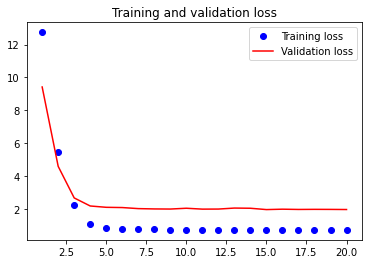

In [113]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [114]:
# load the checkpointed model and compute its test MAE
fully_connected_model = keras.models.load_model("temp_fully_connected.keras")

print(f"Validation MAE fully connected: {evaluate_model(val_ds, model=fully_connected_model):.2f}")

Validation MAE fully connected: 0.79


Model is overfitting

### LSTM Model

In [115]:
#every sample in train/validation/test is a 2d tensor of shape (sequence_length, num_features)
inputs = keras.Input(shape=(seq_len, 7))
x = layers.LSTM(16, recurrent_dropout=0.5)(inputs)
x= layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
lstm_model = keras.Model(inputs, outputs)

# check point the best model
checkpoint= keras.callbacks.ModelCheckpoint("temp_lstm.keras",save_best_only=True)

#stop trianing if validation loss does not imrove for 5 consecutive epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', patience=5, min_delta=1e-4, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=3, min_lr=0.0001)
opt= tf.keras.optimizers.RMSprop()
lstm_model.compile(optimizer=opt,  loss="mse", metrics=["mae"])
history = lstm_model.fit(train_ds,
epochs=100,
validation_data=val_ds,
callbacks=[checkpoint, early_stopping, reduce_lr])

Epoch 1/100
159/159 [==============================] - 53s 318ms/step - loss: 0.6051 - mae: 0.5463 - val_loss: 1.8537 - val_mae: 0.8573 - lr: 0.0010
Epoch 2/100
159/159 [==============================] - 45s 284ms/step - loss: 0.4595 - mae: 0.4611 - val_loss: 1.8328 - val_mae: 0.8046 - lr: 0.0010
Epoch 3/100
159/159 [==============================] - 47s 298ms/step - loss: 0.4352 - mae: 0.4422 - val_loss: 1.8459 - val_mae: 0.7783 - lr: 0.0010
Epoch 4/100
159/159 [==============================] - 49s 304ms/step - loss: 0.4187 - mae: 0.4313 - val_loss: 1.8712 - val_mae: 0.7670 - lr: 0.0010
Epoch 5/100
159/159 [==============================] - 49s 310ms/step - loss: 0.4122 - mae: 0.4249 - val_loss: 1.9016 - val_mae: 0.7648 - lr: 0.0010
Epoch 6/100
159/159 [==============================] - 42s 264ms/step - loss: 0.3993 - mae: 0.4196 - val_loss: 1.9505 - val_mae: 0.7703 - lr: 2.0000e-04
Epoch 7/100
159/159 [==============================] - 49s 308ms/step - loss: 0.4019 - mae: 0.4180 - v

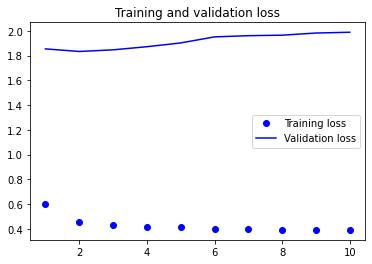

In [116]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [117]:
# load the checkpointed model and compute its test MAE
lstm_model = keras.models.load_model("temp_lstm.keras")

print(f"Validation MAE lstm: {evaluate_model(val_ds, model=lstm_model):.2f}")

Validation MAE lstm: 0.80


lstm model does slightly worse than the fully connected model. The model overfits so stacking more layers probably not going to help but let's try it anyway.

### Stacked LSTM model w/ dropout

In [118]:
#every sample in train/validation/test is a 2d tensor of shape (sequence_length, num_features)
inputs = keras.Input(shape=(seq_len, num_features))
x = layers.LSTM(16, recurrent_dropout=0.5, return_sequences=True)(inputs)
x = layers.LSTM(16, recurrent_dropout=0.5)(inputs)
x= layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
stacked_lstm_model = keras.Model(inputs, outputs)

# check point the best model
checkpoint= keras.callbacks.ModelCheckpoint("temp_lstm_stacked.keras",save_best_only=True)

#stop trianing if validation loss does not imrove for 5 consecutive epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', patience=5, min_delta=1e-4, restore_best_weights=True)


stacked_lstm_model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = stacked_lstm_model.fit(train_ds,
epochs=100,
validation_data=val_ds,
callbacks=[checkpoint, early_stopping, reduce_lr])

Epoch 1/100
159/159 [==============================] - 51s 311ms/step - loss: 0.5827 - mae: 0.5379 - val_loss: 2.0000 - val_mae: 0.7798 - lr: 0.0010
Epoch 2/100
159/159 [==============================] - 43s 269ms/step - loss: 0.4577 - mae: 0.4596 - val_loss: 1.9725 - val_mae: 0.7678 - lr: 0.0010
Epoch 3/100
159/159 [==============================] - 49s 309ms/step - loss: 0.4355 - mae: 0.4394 - val_loss: 1.9955 - val_mae: 0.7726 - lr: 0.0010
Epoch 4/100
159/159 [==============================] - 47s 296ms/step - loss: 0.4191 - mae: 0.4301 - val_loss: 2.0318 - val_mae: 0.7844 - lr: 0.0010
Epoch 5/100
159/159 [==============================] - 51s 321ms/step - loss: 0.4133 - mae: 0.4243 - val_loss: 2.0806 - val_mae: 0.7987 - lr: 0.0010
Epoch 6/100
159/159 [==============================] - 45s 286ms/step - loss: 0.4059 - mae: 0.4213 - val_loss: 2.1397 - val_mae: 0.8186 - lr: 2.0000e-04
Epoch 7/100
159/159 [==============================] - 45s 284ms/step - loss: 0.4030 - mae: 0.4174 - v

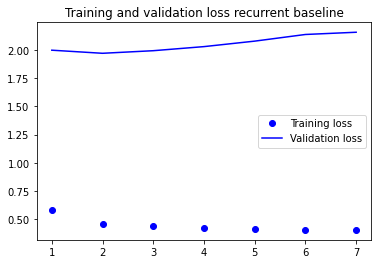

In [119]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss recurrent baseline')
plt.legend()
plt.show()

In [120]:
# load the checkpointed model and compute its test MAE
stacked_lstm_model = keras.models.load_model("temp_lstm_stacked.keras")


print(f"Validation MAE stacked lstm: {evaluate_model(val_ds, model=stacked_lstm_model):.2f}")

Validation MAE stacked lstm: 0.77


stacking lstm layers helped a little

## 1D Convolution

In [121]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, min_delta=1e-3, restore_best_weights=True)

inputs = keras.Input(shape=(seq_len, 7))
# a 1D convolutional layer
x = layers.Conv1D(32, 14)(inputs)
x= layers.BatchNormalization()(x)
x= layers.ReLU()(x)
x = layers.MaxPooling1D(2)(x)

# a 1D convolutional layer 
x = layers.Conv1D(32, 14)(x)
x= layers.BatchNormalization()(x)
x= layers.ReLU()(x)
x = layers.MaxPooling1D(2)(x)


# a global average pooling layer that takes the global average along the temporal dimension
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1)(x)
conv1D_model = keras.Model(inputs, outputs)

conv1D_model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 60, 7)]           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 47, 32)            3168      
                                                                 
 batch_normalization_2 (Batc  (None, 47, 32)           128       
 hNormalization)                                                 
                                                                 
 re_lu_2 (ReLU)              (None, 47, 32)            0         
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 23, 32)           0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 10, 32)            1436

In [122]:
# check point the best model
checkpoint= keras.callbacks.ModelCheckpoint("temp_conv1d.keras",save_best_only=True)




conv1D_model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = conv1D_model.fit(train_ds,
epochs=100,
validation_data=val_ds,
callbacks=[checkpoint, early_stopping, reduce_lr])

Epoch 1/100
159/159 [==============================] - 10s 53ms/step - loss: 0.6014 - mae: 0.5537 - val_loss: 3.6232 - val_mae: 1.2841 - lr: 0.0010
Epoch 2/100
159/159 [==============================] - 7s 46ms/step - loss: 0.4020 - mae: 0.4272 - val_loss: 2.5638 - val_mae: 0.9516 - lr: 0.0010
Epoch 3/100
159/159 [==============================] - 6s 39ms/step - loss: 0.3616 - mae: 0.4008 - val_loss: 2.1313 - val_mae: 0.8861 - lr: 0.0010
Epoch 4/100
159/159 [==============================] - 6s 36ms/step - loss: 0.3377 - mae: 0.3850 - val_loss: 2.0375 - val_mae: 0.9162 - lr: 0.0010
Epoch 5/100
159/159 [==============================] - 7s 44ms/step - loss: 0.3208 - mae: 0.3736 - val_loss: 2.0558 - val_mae: 0.9438 - lr: 0.0010
Epoch 6/100
159/159 [==============================] - 5s 32ms/step - loss: 0.3077 - mae: 0.3640 - val_loss: 2.1090 - val_mae: 0.9580 - lr: 0.0010
Epoch 7/100
159/159 [==============================] - 7s 46ms/step - loss: 0.2974 - mae: 0.3568 - val_loss: 2.1753 -

In [123]:
# load the checkpointed model and compute its test MAE
conv1D_model = keras.models.load_model("temp_conv1d.keras")


print(f"Validation MAE conv1d {evaluate_model(val_ds, model=conv1D_model):.2f}")

Validation MAE conv1d 0.92


The 1d convolutional model does worse than MLP and LSTM and performs just as good as the commonsense model

The best model so far has been the stacked lstm model. Let's compare its performance on the test data to the commonsense model.

In [125]:
lstm_model = keras.models.load_model("temp_lstm_stacked.keras")
print(f"stacked lstm fully connected on test data: {evaluate_model(test_ds, model=lstm_model):.2f}")
print(f"MAE  commonsense baseline on the test data: {evaluate_model(test_ds):.2f}")

stacked lstm fully connected on test data: 0.67
MAE  commonsense baseline on the test data: 0.94


Performance of LSTM model on test data is much much better than the commonsense model.

## Plot predicted vs true death values for each state

Since we have a total of 1590 samples in the test dataset and 53 states, each state has 1590/53=30 data points. So I set the batch_size for test data in create_time_series method to 30 and re-created the test_ds. 

Then here I iterate through the test data set batch by batch and plot the predicted vs true test labels as follows:

1/1 [==============================] - 0s 34ms/step
(30,)
(30,)


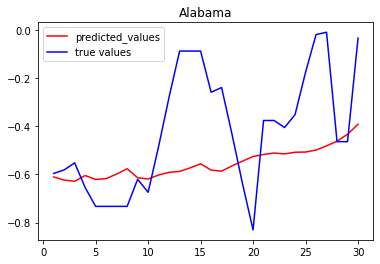

1/1 [==============================] - 1s 706ms/step
(30,)
(30,)


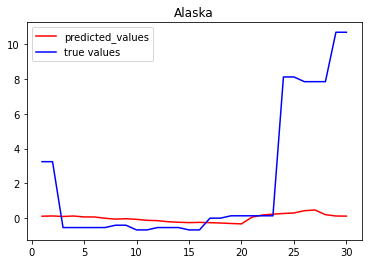

1/1 [==============================] - 0s 32ms/step
(30,)
(30,)


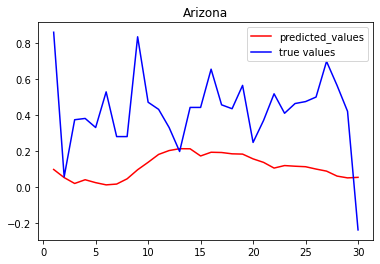

1/1 [==============================] - 1s 822ms/step
(30,)
(30,)


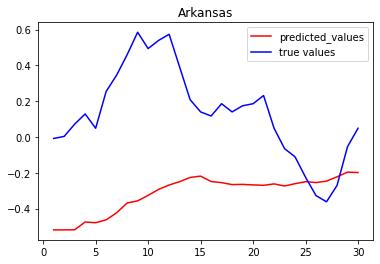

1/1 [==============================] - 0s 33ms/step
(30,)
(30,)


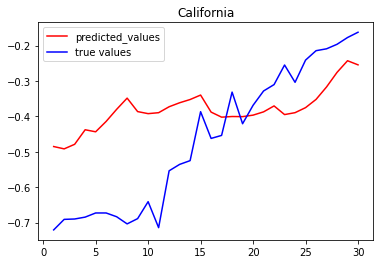

1/1 [==============================] - 0s 32ms/step
(30,)
(30,)


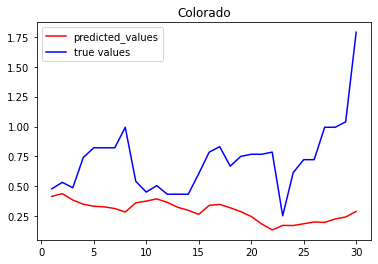

1/1 [==============================] - 1s 684ms/step
(30,)
(30,)


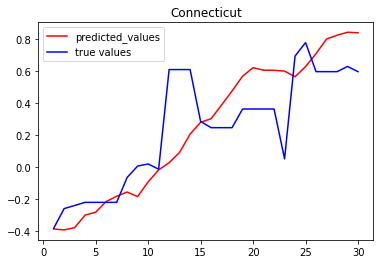

1/1 [==============================] - 0s 32ms/step
(30,)
(30,)


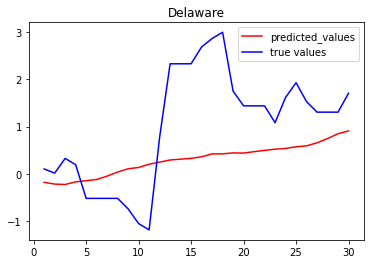

1/1 [==============================] - 0s 33ms/step
(30,)
(30,)


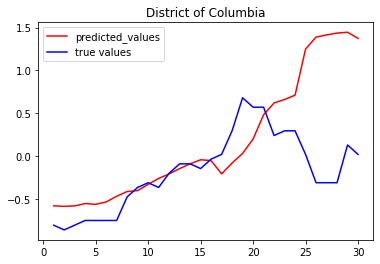

1/1 [==============================] - 0s 32ms/step
(30,)
(30,)


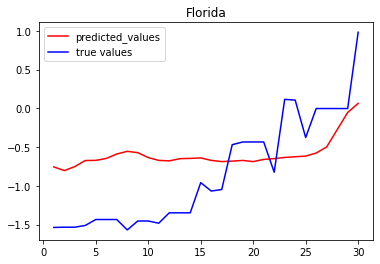

1/1 [==============================] - 0s 31ms/step
(30,)
(30,)


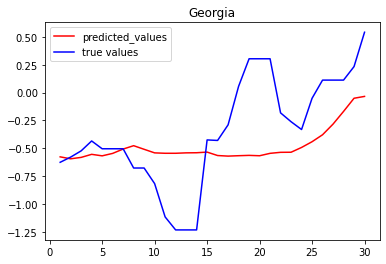

1/1 [==============================] - 0s 32ms/step
(30,)
(30,)


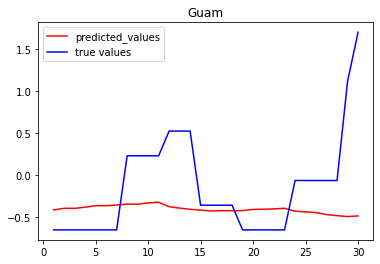

1/1 [==============================] - 0s 32ms/step
(30,)
(30,)


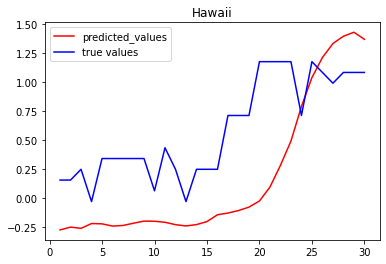

1/1 [==============================] - 1s 674ms/step
(30,)
(30,)


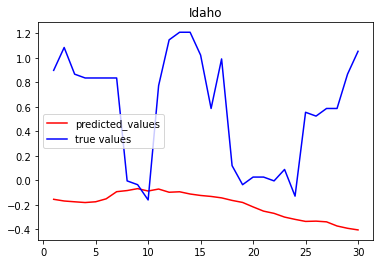

1/1 [==============================] - 0s 32ms/step
(30,)
(30,)


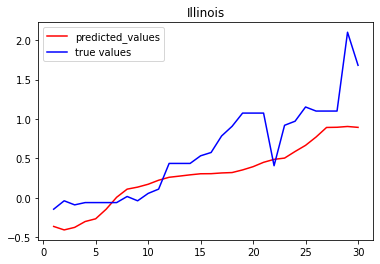

1/1 [==============================] - 1s 628ms/step
(30,)
(30,)


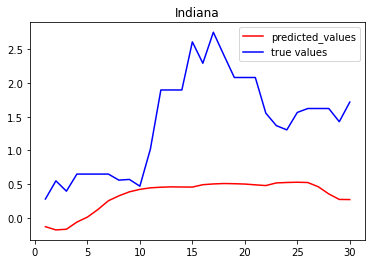

1/1 [==============================] - 0s 31ms/step
(30,)
(30,)


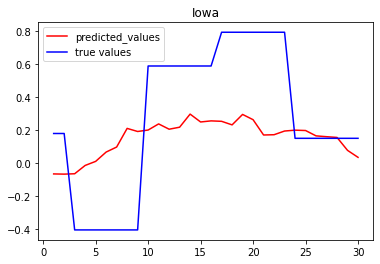

1/1 [==============================] - 0s 32ms/step
(30,)
(30,)


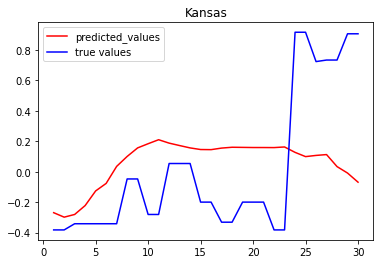

1/1 [==============================] - 0s 32ms/step
(30,)
(30,)


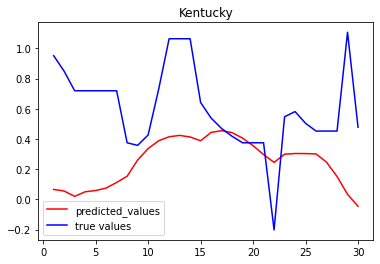

1/1 [==============================] - 0s 32ms/step
(30,)
(30,)


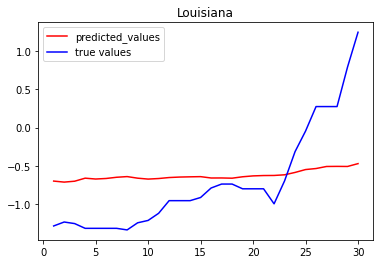

1/1 [==============================] - 1s 860ms/step
(30,)
(30,)


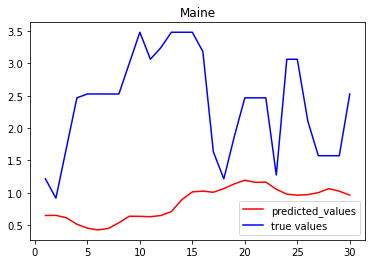

1/1 [==============================] - 0s 33ms/step
(30,)
(30,)


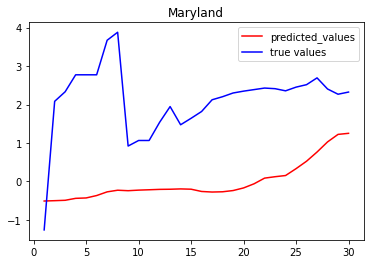

1/1 [==============================] - 0s 32ms/step
(30,)
(30,)


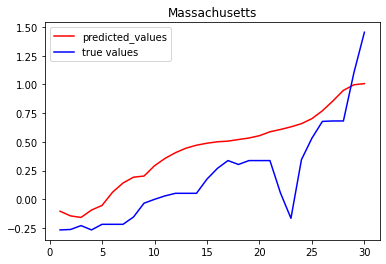

1/1 [==============================] - 0s 33ms/step
(30,)
(30,)


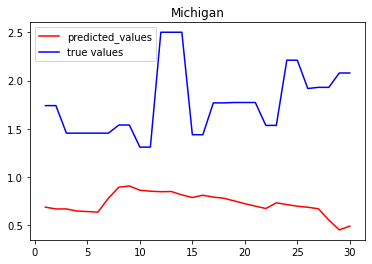

1/1 [==============================] - 0s 250ms/step
(30,)
(30,)


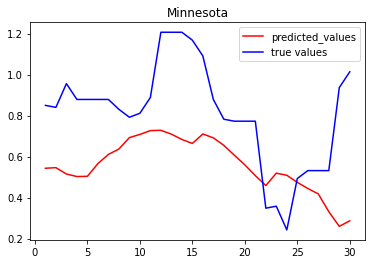

1/1 [==============================] - 0s 32ms/step
(30,)
(30,)


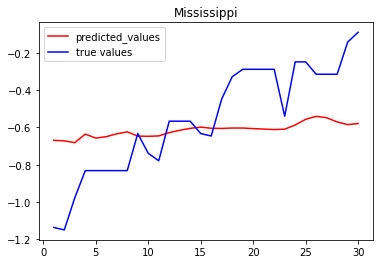

1/1 [==============================] - 1s 643ms/step
(30,)
(30,)


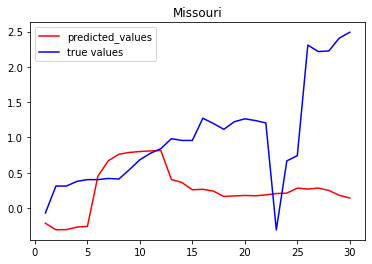

1/1 [==============================] - 0s 32ms/step
(30,)
(30,)


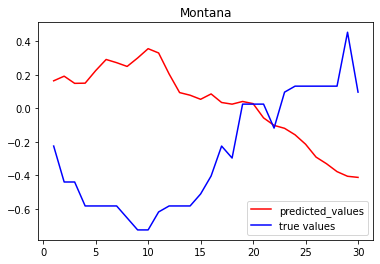

1/1 [==============================] - 1s 631ms/step
(30,)
(30,)


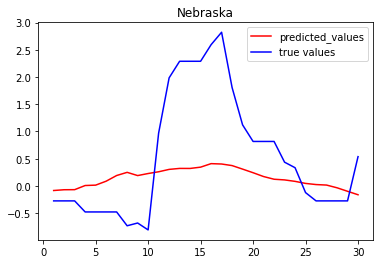

1/1 [==============================] - 0s 32ms/step
(30,)
(30,)


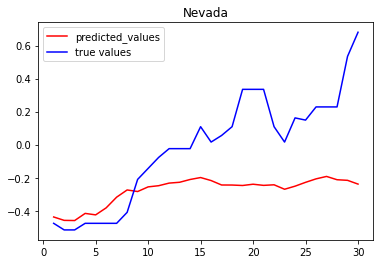

1/1 [==============================] - 1s 633ms/step
(30,)
(30,)


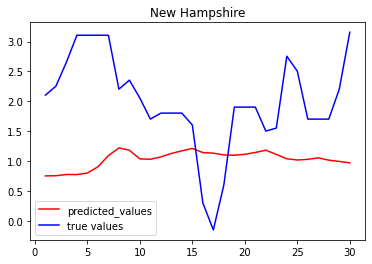

1/1 [==============================] - 0s 33ms/step
(30,)
(30,)


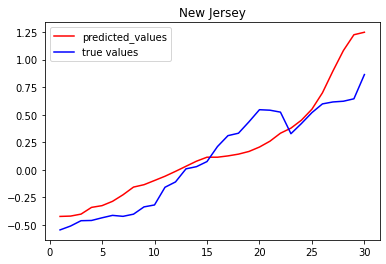

1/1 [==============================] - 0s 31ms/step
(30,)
(30,)


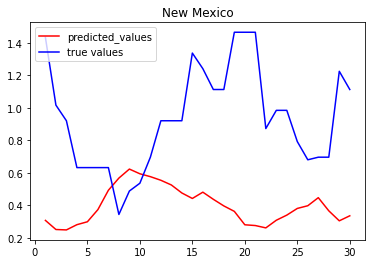

1/1 [==============================] - 0s 34ms/step
(30,)
(30,)


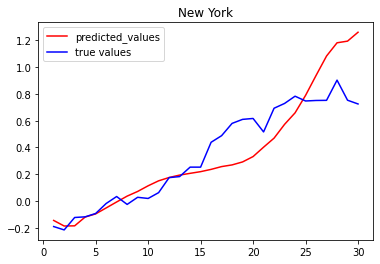

1/1 [==============================] - 0s 32ms/step
(30,)
(30,)


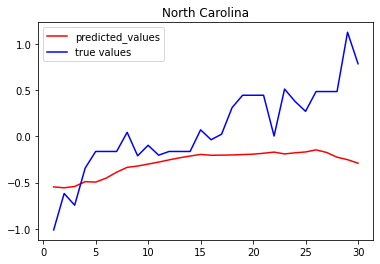

1/1 [==============================] - 0s 160ms/step
(30,)
(30,)


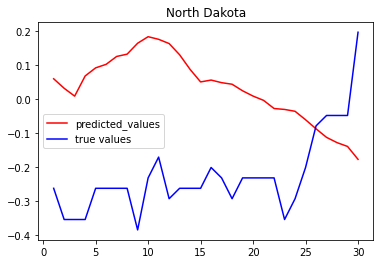

1/1 [==============================] - 0s 33ms/step
(30,)
(30,)


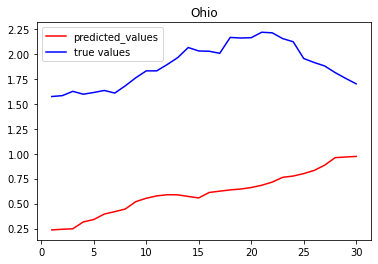

1/1 [==============================] - 1s 598ms/step
(30,)
(30,)


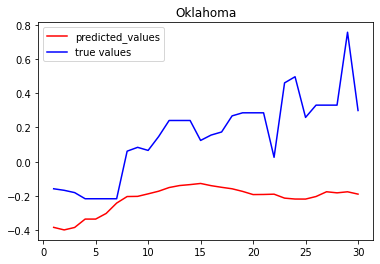

1/1 [==============================] - 0s 34ms/step
(30,)
(30,)


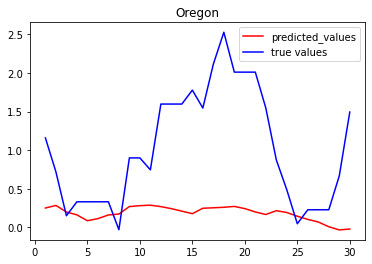

1/1 [==============================] - 1s 581ms/step
(30,)
(30,)


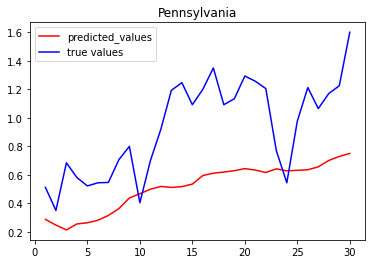

1/1 [==============================] - 0s 32ms/step
(30,)
(30,)


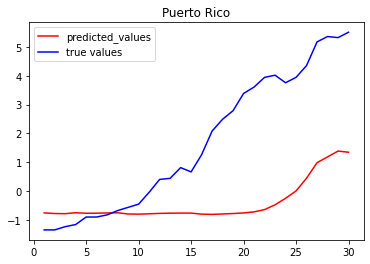

1/1 [==============================] - 1s 578ms/step
(30,)
(30,)


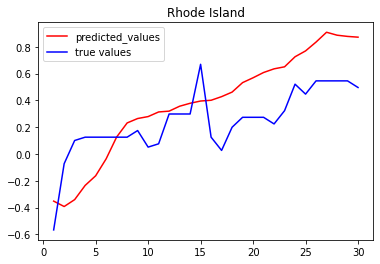

1/1 [==============================] - 0s 34ms/step
(30,)
(30,)


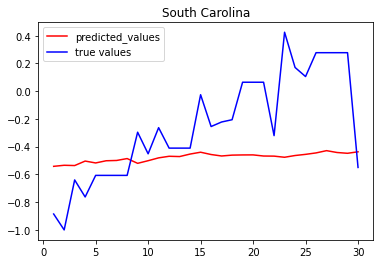

1/1 [==============================] - 0s 33ms/step
(30,)
(30,)


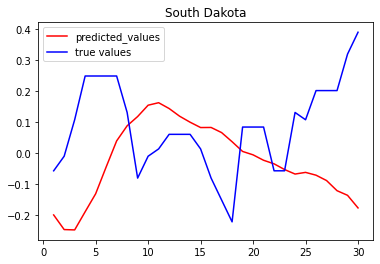

1/1 [==============================] - 0s 33ms/step
(30,)
(30,)


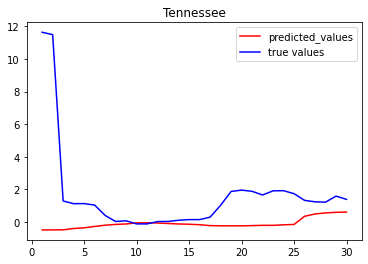

1/1 [==============================] - 0s 315ms/step
(30,)
(30,)


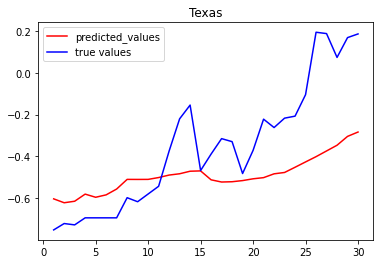

1/1 [==============================] - 0s 32ms/step
(30,)
(30,)


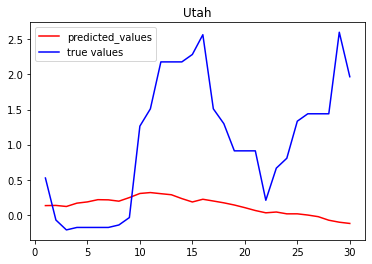

1/1 [==============================] - 0s 33ms/step
(30,)
(30,)


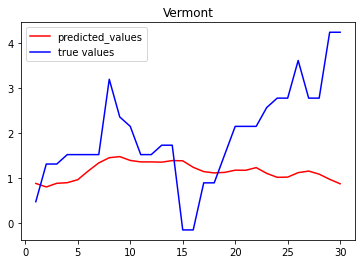

1/1 [==============================] - 0s 32ms/step
(30,)
(30,)


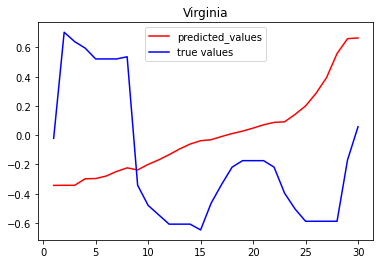

1/1 [==============================] - 0s 32ms/step
(30,)
(30,)


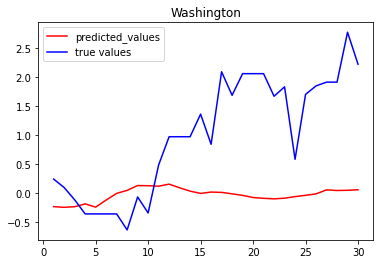

1/1 [==============================] - 1s 853ms/step
(30,)
(30,)


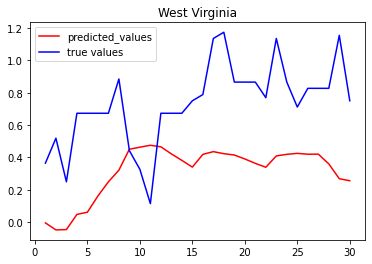

1/1 [==============================] - 0s 32ms/step
(30,)
(30,)


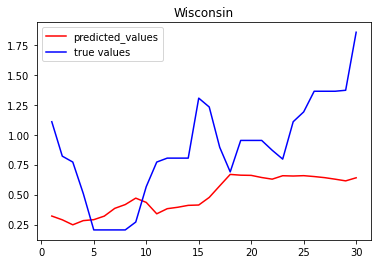

1/1 [==============================] - 0s 33ms/step
(30,)
(30,)


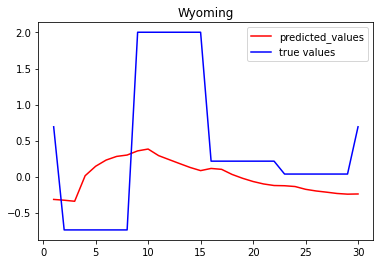

In [126]:
for i, (samples, targets) in enumerate(test_ds):
   state= states[i]
   preds= lstm_model.predict(samples).flatten()
   print(preds.shape)
   print(targets.shape)
   
   plt.plot(range(1,len(preds)+1),preds, 'r', label="predicted_values")
   plt.plot(range(1,len(targets)+1), targets, 'b', label="true values")
   plt.legend()
   plt.title(state)
   plt.show()